In [1061]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Objective
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

* It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

* It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, recommend strategies to manage customer churn based on your observations.


https://learn.upgrad.com/v/course/329/session/59147/segment/328679

### Hints to work with
1. Use first two months as good phase, next one month as action phase and forth month as churn phase
    1. Identify high value customers  - good and action phase
    2. Define churn - churn phase

In [1062]:
master_df = pd.read_csv('data/telecom_churn_data.csv')
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data Understanding and Cleanup

In [1063]:
master_df.shape

(99999, 226)

In [1064]:
master_df['mobile_number'].nunique()

99999

In [1065]:
drop_cols = ['mobile_number']

In [1066]:
def pretty_print_cols_list(cols):
    rows = len(cols)//5
    if len(cols) % 5:
        rows += 1
    for i in range(rows):
        start_index = i*5
        print(cols[start_index:start_index+5])
        
def pretty_print_cols(df):
    cols = list(df.columns)

    pretty_print_cols_list(cols)
        
pretty_print_cols(master_df)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6']
['arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7']
['onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
['offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9']
['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6']
['loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7']
['loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']
['loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9']
['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6']
['std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7']
['std

In [1067]:
master_df['circle_id'].nunique()

1

All customers belong to same circle - not useful.

In [1068]:
drop_cols.append('circle_id')

In [1069]:
master_df[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 3 columns):
loc_og_t2o_mou    98981 non-null float64
std_og_t2o_mou    98981 non-null float64
loc_ic_t2o_mou    98981 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


In [1070]:
master_df[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,98981.0,98981.0,98981.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


No info in these columns.

In [1071]:
drop_cols.extend(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'])

In [1072]:
revenue_cols = [ 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9']

master_df[revenue_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
arpu_6    99999 non-null float64
arpu_7    99999 non-null float64
arpu_8    99999 non-null float64
arpu_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [1073]:
master_df[revenue_cols].describe()

,arpu_6,arpu_7,arpu_8,arpu_9
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731,261.645069
std,328.439770,338.156291,344.474791,341.998630
min,-2258.709000,-2014.045000,-945.808000,-1899.505000
25%,93.411500,86.980500,84.126000,62.685000
50%,197.704000,191.640000,192.080000,176.849000
75%,371.060000,365.344500,369.370500,353.466500
max,27731.088000,35145.834000,33543.624000,38805.617000


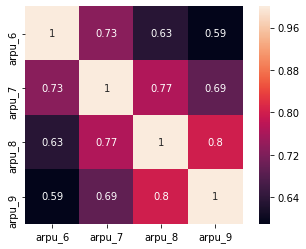

In [1074]:
sns.heatmap(master_df[revenue_cols].corr(), square=True, annot=True)
plt.show()

There is a strong correlation between revenue in 8th month and 9th month. Anyhow, revenue from first 2 months is relevant as the next two months are post information. And we could merge revenue from first two months.

In [1075]:
cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9']
master_df[cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327
std,297.207406,308.794148,308.951589,308.477668
min,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000
50%,34.310000,32.330000,32.360000,29.840000
75%,118.740000,115.595000,115.860000,112.130000
max,7376.710000,8157.780000,10752.560000,10427.460000


In [1076]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

In [1077]:
# get all cols where min and max are same
same_val_cols = []
for c in master_df.columns:
    try:
        if master_df[c].min() == master_df[c].max():
            same_val_cols.append(c)
    except:
        pass
pretty_print_cols_list(same_val_cols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6']
['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6']
['std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [1078]:
# drop all same valued columns as they dont offer any info
drop_cols.extend(same_val_cols)

#### Filter High Value customers

In [1079]:
master_df[['mobile_number', 'total_rech_num_6', 'total_rech_amt_6']].head()

,mobile_number,total_rech_num_6,total_rech_amt_6
0,7000842753,4,362
1,7001865778,4,74
2,7001625959,5,168
3,7001204172,10,230
4,7000142493,5,196


In [1080]:
master_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].describe(percentiles=[0.25, 0.5, 0.7, 0.9])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,324.157122
std,398.019701,408.114237,416.540455
min,0.000000,0.000000,0.000000
25%,109.000000,100.000000,90.000000
50%,230.000000,220.000000,225.000000
70%,378.000000,370.000000,380.000000
90%,732.000000,731.000000,736.000000
max,35190.000000,40335.000000,45320.000000


In [1081]:
avg_amount = ((master_df['total_rech_amt_6'] + master_df['total_rech_amt_7']) / 2).quantile(0.7)
total_customers = master_df.shape[0]
master_df = master_df[((master_df['total_rech_amt_6'] + master_df['total_rech_amt_7'])/2 >
                              avg_amount)]
print(f"high value customers [{master_df.shape[0]}] [{round(master_df.shape[0]/total_customers * 100, 2)}%]")

high value customers [29979] [29.98%]


#### Tag churners

In [1082]:
tag_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
master_df[tag_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29979.000000,29979.000000,29979.000000,29979.000000
mean,277.553243,563.027651,62.249265,271.706499
std,356.582690,654.435594,244.535687,896.405238
min,0.000000,0.000000,0.000000,0.000000
25%,63.620000,136.510000,0.000000,0.000000
50%,176.230000,383.340000,0.000000,0.000000
75%,360.695000,757.620000,6.335000,0.000000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [1083]:
master_df['churn'] = master_df[tag_cols].sum(axis='columns') == 0

master_df['churn'].map({True: 1, False: 0})

master_df['churn'].sum()

2589

In [1084]:
master_df.drop(columns=tag_cols, inplace=True)

In [1085]:
master_df.shape

(29979, 223)

In [1086]:
drop_month_9_cols = [c for c in master_df.columns if '_9' in c]
pretty_print_cols_list(drop_month_9_cols)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9']
['roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9']
['loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9']
['std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9']
['loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9']
['std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9']
['ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9']
['last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9']
['count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9']
['monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [1087]:
drop_cols.extend(drop_month_9_cols)

In [1088]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

In [1089]:
drop_cols.extend([c for c in master_df.columns if 'date' in c])

#### Preprocessing

In [1090]:
print(f'Before: {master_df.shape}')
master_df = master_df.drop(columns=drop_cols)
print(f'After: {master_df.shape}')

Before: (29979, 223)
After: (29979, 153)


Missing values:

In [1091]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 153 entries, arpu_6 to churn
dtypes: bool(1), float64(127), int64(25)
memory usage: 35.0 MB


In [1092]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

In [1093]:
# look at columns where percentage of missing values is greater than 30%
def percentage(x):
    return round(x * 100, 2)

def get_missing_value_df():
    missing_values = pd.DataFrame()
    missing_cols = []
    missing_pers = []
    for c in master_df.columns:
        missing_percentage = percentage(master_df[c].isnull().sum() / master_df.shape[0])
        if missing_percentage > 0:
            missing_cols.append(c)
            missing_pers.append(missing_percentage)
    missing_values['col'] = missing_cols
    missing_values['per'] = missing_pers
    missing_values.columns=missing_values.columns.str.strip()
    missing_values.sort_values('per', ascending=False, inplace=True)
    return missing_values

In [1094]:
missing_values = get_missing_value_df()
print(missing_values[missing_values['per'] >= 30])

                    col    per
99            arpu_2g_6  62.02
81    total_rech_data_6  62.02
105           fb_user_6  62.02
96            arpu_3g_6  62.02
90      count_rech_3g_6  62.02
84      max_rech_data_6  62.02
102    night_pck_user_6  62.02
87      count_rech_2g_6  62.02
93   av_rech_amt_data_6  62.02
88      count_rech_2g_7  61.13
91      count_rech_3g_7  61.13
97            arpu_3g_7  61.13
94   av_rech_amt_data_7  61.13
100           arpu_2g_7  61.13
85      max_rech_data_7  61.13
103    night_pck_user_7  61.13
82    total_rech_data_7  61.13
106           fb_user_7  61.13
89      count_rech_2g_8  60.84
83    total_rech_data_8  60.84
92      count_rech_3g_8  60.84
86      max_rech_data_8  60.84
107           fb_user_8  60.84
95   av_rech_amt_data_8  60.84
104    night_pck_user_8  60.84
98            arpu_3g_8  60.84
101           arpu_2g_8  60.84


In [1095]:
master_df['arpu_2g_6'].describe()

count    11387.000000
mean       132.375393
std        225.690628
min        -15.320000
25%          0.010000
50%         40.340000
75%        212.170000
max       6433.760000
Name: arpu_2g_6, dtype: float64

In [1096]:
arpu_cols = [c for c in list(master_df.columns) if 'arpu' in c]
pretty_print_cols_list(arpu_cols)

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7']
['arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


In [1097]:
master_df[arpu_cols][master_df['arpu_2g_6'].isnull()].head()

,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
7,1069.180,1349.850,3171.480,NaN,NaN,NaN,NaN,NaN,NaN
8,378.721,492.223,137.362,NaN,0.0,19.83,NaN,0.0,0.0
13,492.846,205.671,593.260,NaN,NaN,0.00,NaN,NaN,0.2
16,430.975,299.869,187.894,NaN,NaN,NaN,NaN,NaN,NaN
17,690.008,18.980,25.499,NaN,NaN,NaN,NaN,NaN,NaN


In [1098]:
# Can mark all arpu 3g and 2g to 0 for NaN.
arpu_data_cols = ['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']
master_df[arpu_data_cols] = master_df[arpu_data_cols].fillna(0)

In [1099]:
missing_values = get_missing_value_df()
print(missing_values[missing_values['per'] >= 30])

                    col    per
87      count_rech_2g_6  62.02
81    total_rech_data_6  62.02
99            fb_user_6  62.02
93   av_rech_amt_data_6  62.02
84      max_rech_data_6  62.02
90      count_rech_3g_6  62.02
96     night_pck_user_6  62.02
85      max_rech_data_7  61.13
88      count_rech_2g_7  61.13
94   av_rech_amt_data_7  61.13
91      count_rech_3g_7  61.13
97     night_pck_user_7  61.13
82    total_rech_data_7  61.13
100           fb_user_7  61.13
86      max_rech_data_8  60.84
89      count_rech_2g_8  60.84
101           fb_user_8  60.84
83    total_rech_data_8  60.84
95   av_rech_amt_data_8  60.84
98     night_pck_user_8  60.84
92      count_rech_3g_8  60.84


In [1100]:
count_cols = [c for c in master_df.columns if 'count' in c]
count_cols

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8']

In [1101]:
# fill na counts to 0
master_df[count_cols] = master_df[count_cols].fillna(0)

In [1102]:
missing_values = get_missing_value_df()
print(missing_values[missing_values['per'] >= 30])

                   col    per
84     max_rech_data_6  62.02
93           fb_user_6  62.02
81   total_rech_data_6  62.02
90    night_pck_user_6  62.02
87  av_rech_amt_data_6  62.02
88  av_rech_amt_data_7  61.13
94           fb_user_7  61.13
85     max_rech_data_7  61.13
91    night_pck_user_7  61.13
82   total_rech_data_7  61.13
95           fb_user_8  60.84
86     max_rech_data_8  60.84
89  av_rech_amt_data_8  60.84
92    night_pck_user_8  60.84
83   total_rech_data_8  60.84


In [1103]:
data_cols = [c for c in master_df.columns if 'data' in c]
data_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [1104]:
# fill na to 0
master_df[data_cols] = master_df[data_cols].fillna(0)

In [1105]:
missing_values = get_missing_value_df()
print(missing_values[missing_values['per'] >= 30])

                 col    per
84         fb_user_6  62.02
81  night_pck_user_6  62.02
85         fb_user_7  61.13
82  night_pck_user_7  61.13
86         fb_user_8  60.84
83  night_pck_user_8  60.84


In [1106]:
master_df['fb_user_6'].describe()

count    11387.000000
mean         0.897603
std          0.303184
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_6, dtype: float64

In [1107]:
cols = missing_values[missing_values['per'] >= 30]['col'].values
cols

array(['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7',
       'fb_user_8', 'night_pck_user_8'], dtype=object)

In [1108]:
master_df[cols] = master_df[cols].fillna(0)

Fill all number cols in month 8 with 0, meaning the customer has stopped using the services.

In [1109]:
missing_values = get_missing_value_df()
month_8_cols = [c for c in missing_values['col'] if '_8' in c]

for c in month_8_cols:
    print(f'{c} {master_df.dtypes[c]}')

ic_others_8 float64
loc_og_t2m_mou_8 float64
std_og_mou_8 float64
spl_og_mou_8 float64
std_og_t2f_mou_8 float64
og_others_8 float64
std_og_t2m_mou_8 float64
loc_ic_t2t_mou_8 float64
std_og_t2t_mou_8 float64
loc_ic_t2m_mou_8 float64
loc_og_mou_8 float64
loc_ic_t2f_mou_8 float64
loc_og_t2c_mou_8 float64
loc_ic_mou_8 float64
isd_og_mou_8 float64
std_ic_t2t_mou_8 float64
loc_og_t2f_mou_8 float64
std_ic_t2m_mou_8 float64
spl_ic_mou_8 float64
onnet_mou_8 float64
loc_og_t2t_mou_8 float64
std_ic_t2f_mou_8 float64
isd_ic_mou_8 float64
roam_og_mou_8 float64
std_ic_mou_8 float64
offnet_mou_8 float64
roam_ic_mou_8 float64


In [1110]:
master_df[month_8_cols] = master_df[month_8_cols].fillna(0)

In [1111]:
missing_values = get_missing_value_df()
# get all float types and impute them with their mean
float_cols = [c for c in missing_values['col'] if master_df.dtypes[c] == np.float64]
pretty_print_cols_list(float_cols)

['onnet_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_mou_6', 'og_others_6']
['spl_og_mou_6', 'std_ic_t2t_mou_6', 'isd_og_mou_6', 'std_og_mou_6', 'std_ic_t2m_mou_6']
['std_og_t2f_mou_6', 'std_og_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_og_t2t_mou_6', 'loc_ic_t2f_mou_6']
['loc_ic_t2m_mou_6', 'std_ic_mou_6', 'loc_og_t2f_mou_6', 'spl_ic_mou_6', 'offnet_mou_6']
['loc_og_t2m_mou_6', 'ic_others_6', 'loc_og_t2t_mou_6', 'loc_og_t2c_mou_6', 'isd_ic_mou_6']
['roam_og_mou_6', 'roam_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7']
['isd_ic_mou_7', 'spl_ic_mou_7', 'std_ic_t2m_mou_7', 'std_ic_mou_7', 'std_ic_t2f_mou_7']
['isd_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2t_mou_7', 'offnet_mou_7', 'roam_ic_mou_7']
['roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7']
['loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7']
['onnet_mou_7', 'spl_og_mou_7', 'og_others_7', 'ic_others_7']


In [1112]:
for c in float_cols:
    mean_val = master_df[c].mean()
    master_df[c] = master_df[c].fillna(mean_val)

In [1113]:
missing_values = get_missing_value_df()
missing_values

,col,per


In [1114]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 153 entries, arpu_6 to churn
dtypes: bool(1), float64(127), int64(25)
memory usage: 35.0 MB


In [1115]:
master_df['churn'] = master_df['churn'].astype('int32')

In [1116]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 153 entries, arpu_6 to churn
dtypes: float64(127), int32(1), int64(25)
memory usage: 35.1 MB


At this point all the columns are numerical and no missing values.

#### EDA and Derive new features

In [1117]:
# get all mou columns and look at their correlations
mou_cols = [c for c in master_df.columns if 'mou' in c]
pretty_print_cols_list(mou_cols)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7']
['offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6']
['roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8']
['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7']
['loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6']
['loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8']
['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7']
['std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6']
['isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']
['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7']
['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_

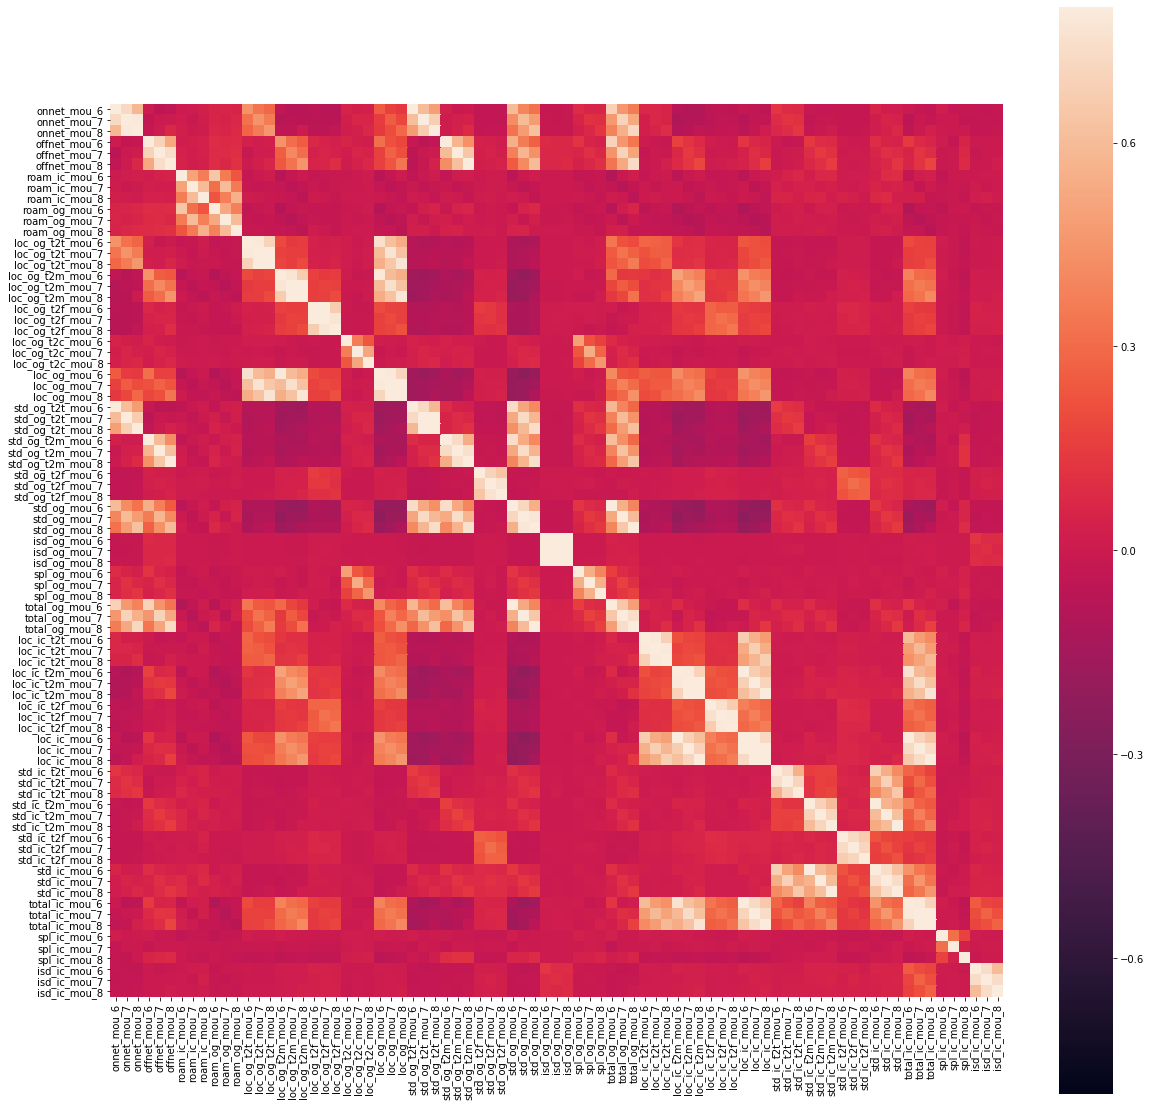

In [1118]:
corr = master_df[mou_cols].corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax)
plt.show()

Its clear that 6, 7, 8 months corresponding mou's are mostly related. We can form new columns by combining each into a total mou.

In [1119]:
mous_month_6 = [c.split('_6')[0] for c in mou_cols if '_6' in c]

for c in mous_month_6:
    master_df[c] = (master_df[c+'_6'] + master_df[c+'_7'] + master_df[c+'_8']) / 3

In [1120]:
master_df = master_df.drop(columns=mou_cols)

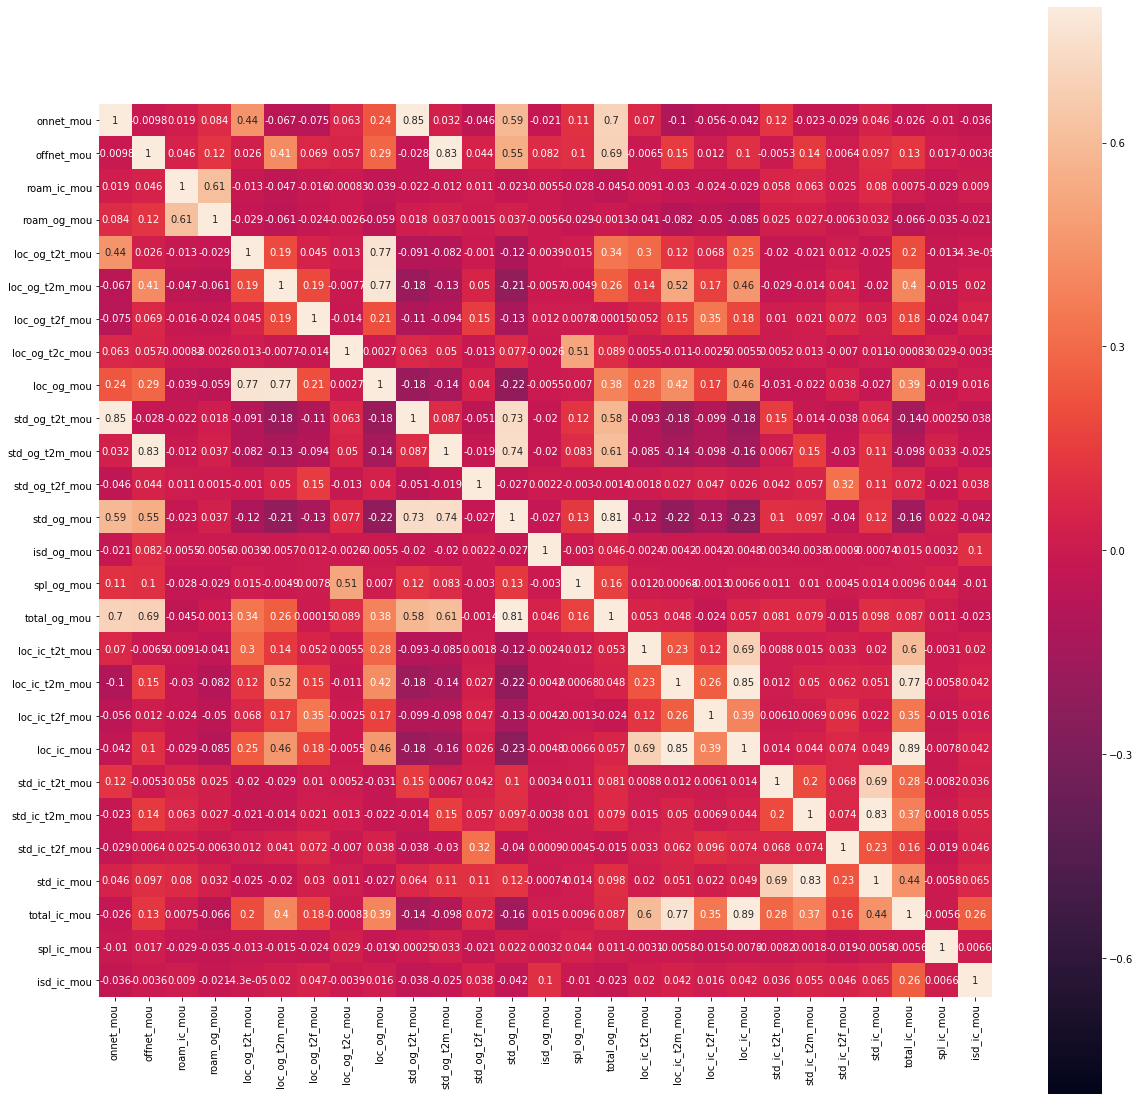

In [1121]:
corr = master_df[mous_month_6].corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1122]:
pretty_print_cols(master_df)

['arpu_6', 'arpu_7', 'arpu_8', 'og_others_6', 'og_others_7']
['og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6']
['total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7']
['last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6']
['max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8']
['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7']
['av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6']
['vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']
['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7']
['night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6']
['sachet_2g_7', 'sachet_2g_8', 'monthl

In [1123]:
# lets look at arpu columns
arpu_cols = [c for c in master_df.columns if 'arpu' in c]
pretty_print_cols_list(arpu_cols)

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7']
['arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


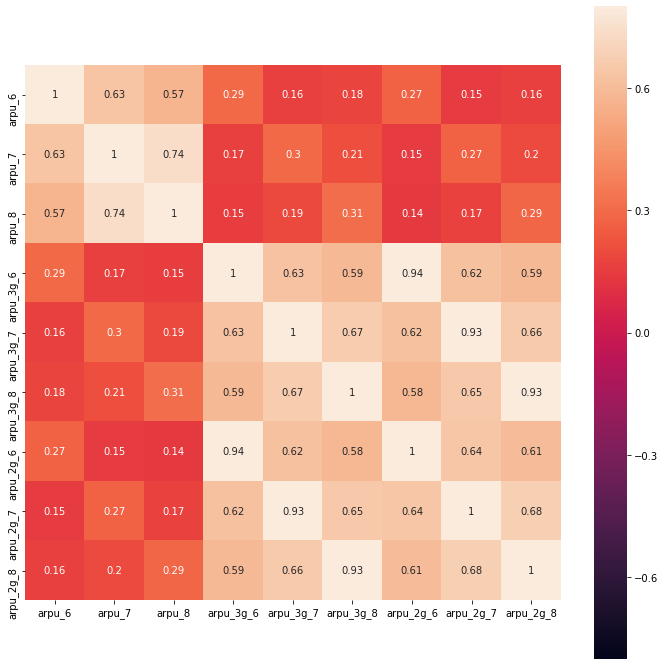

In [1124]:
corr = master_df[arpu_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

arpu of data and total arpu are not related. But we can club all data arpu and arpu of different months.

In [1125]:
master_df['arpu'] = (master_df['arpu_6'] + master_df['arpu_7'] + master_df['arpu_8']) / 3
master_df = master_df.drop(columns=['arpu_6', 'arpu_7', 'arpu_8'])

In [1126]:
master_df['arpu_data'] = (master_df['arpu_2g_6'] + master_df['arpu_2g_7'] + master_df['arpu_2g_8'] + \
                         master_df['arpu_3g_6'] + master_df['arpu_3g_7'] + master_df['arpu_3g_8']) / 6
master_df = master_df.drop(columns=['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                                    'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8'])

In [1127]:
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7']
['ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6']
['total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']
['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7']
['total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6']
['count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']
['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7']
['vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'night_pck_user_6']
['night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7']
['monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6']
['fb_user_

In [1128]:
# look at amounts columns
amnts_cols = [c for c in master_df.columns if 'amt' in c]
pretty_print_cols_list(amnts_cols)

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7']
['max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'av_rech_amt_data_6']
['av_rech_amt_data_7', 'av_rech_amt_data_8']


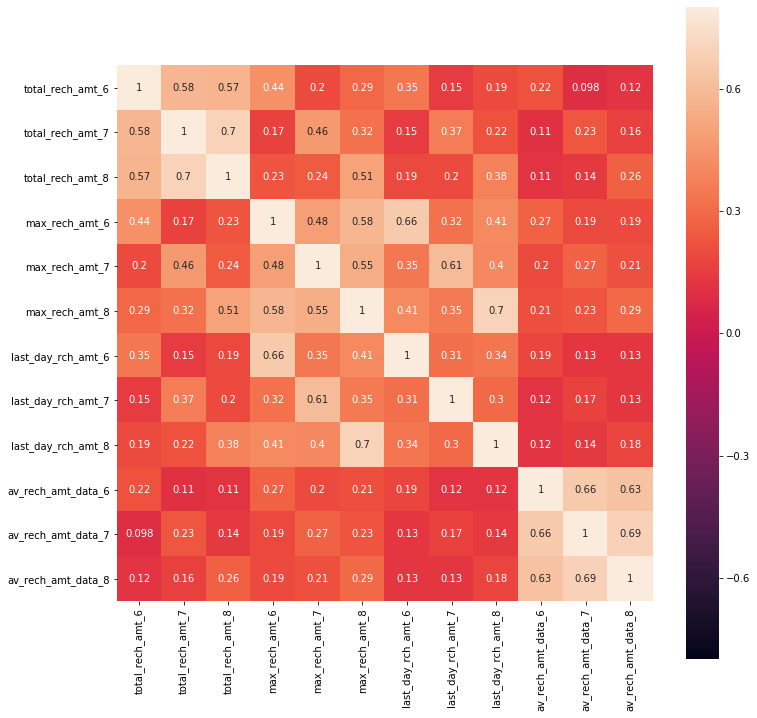

In [1129]:
corr = master_df[amnts_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1130]:
c = 'av_rech_amt_data'
master_df[c] = (master_df[c+'_6'] + master_df[c+'_7'] + master_df[c+'_8'])/3
    
master_df = master_df.drop(columns=[c+'_6', c+'_7', c+'_8'])

In [1131]:
# lets look at count columns
count_cols = [c for c in master_df.columns if 'count' in c]
pretty_print_cols_list(count_cols)

['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7']
['count_rech_3g_8']


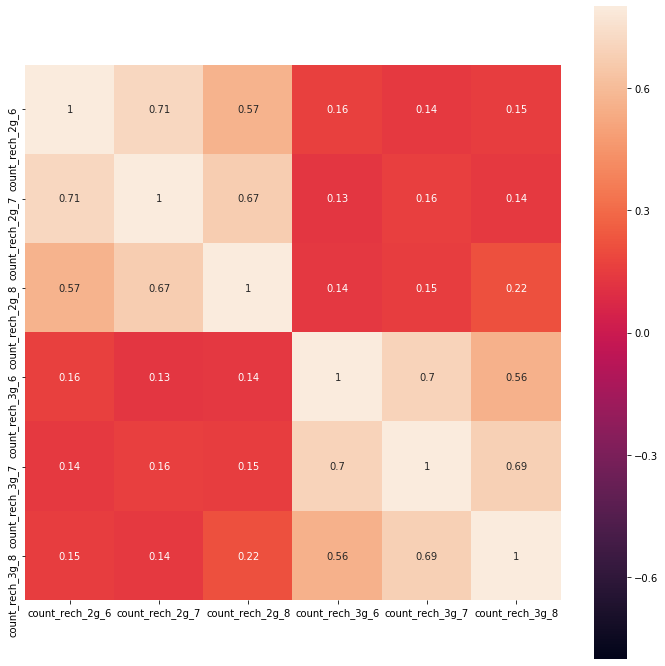

In [1132]:
corr = master_df[count_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1133]:
master_df['count_rec_2g'] = (master_df['count_rech_2g_6'] + \
                            master_df['count_rech_2g_7'] + master_df['count_rech_2g_8']) / 3

master_df['count_rec_3g'] = (master_df['count_rech_3g_6'] + \
                            master_df['count_rech_3g_7'] + master_df['count_rech_3g_8']) / 3

In [1134]:
master_df = master_df.drop(columns=count_cols)

In [1135]:
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7']
['ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6']
['total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']
['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7']
['total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'vol_2g_mb_6']
['vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7']
['monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6']
['monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
['fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g']
['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn', 'onnet_mou']
['offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou'

In [1136]:
# lets look at monthly columns
monthly_cols = [c for c in master_df.columns if 'monthly' in c]
pretty_print_cols_list(monthly_cols)

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7']
['monthly_3g_8']


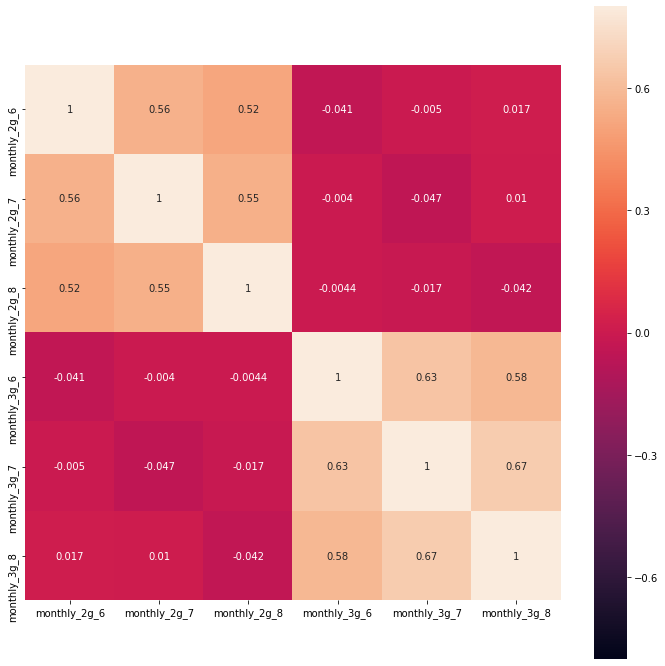

In [1137]:
corr = master_df[monthly_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1138]:
master_df[monthly_cols].describe()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.124954,0.131425,0.114080,0.174055,0.185296,0.173321
std,0.374656,0.387793,0.357335,0.574545,0.620703,0.583178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,14.000000,16.000000,16.000000


In [1139]:
master_df['monthly_2g_6'].value_counts()

0    26651
1     2950
2      345
3       26
4        7
Name: monthly_2g_6, dtype: int64

In [1140]:
master_df['monthly_2g_7'].value_counts()

0    26526
1     3011
2      406
3       29
4        5
5        2
Name: monthly_2g_7, dtype: int64

In [1141]:
master_df['monthly_3g_6'].value_counts()

0     26401
1      2540
2       697
3       207
4        74
5        32
6        11
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

Looks like these are categorical columns. Lets not touch these.

In [1142]:
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7']
['ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6']
['total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']
['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7']
['total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'vol_2g_mb_6']
['vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7']
['monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6']
['monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
['fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g']
['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn', 'onnet_mou']
['offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou'

In [1143]:
# look at others columns
other_cols = [c for c in master_df.columns if 'other' in c]
pretty_print_cols_list(other_cols)

['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7']
['ic_others_8']


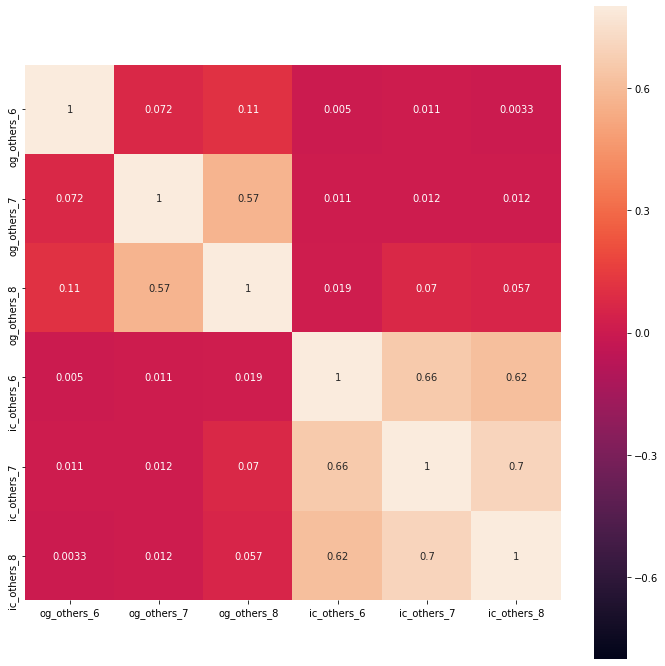

In [1144]:
corr = master_df[other_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1145]:
master_df[other_cols].describe()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.700584,0.048137,0.059194,1.202479,1.493254,1.237346
std,2.281316,2.743244,3.322091,13.993852,15.413854,12.894187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.100000,0.060000,0.060000
max,100.610000,370.130000,394.930000,1344.140000,1495.940000,1209.860000


In [1146]:
c = 'ic_others'
master_df[c] = (master_df[c+'_6'] + master_df[c+'_7'] + master_df[c+'_8']) / 2

master_df = master_df.drop(columns=[c+'_6', c+'_7', c+'_8'])

In [1147]:
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'total_rech_num_6', 'total_rech_num_7']
['total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6']
['max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']
['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7']
['max_rech_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6']
['vol_3g_mb_7', 'vol_3g_mb_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7']
['sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6']
['sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
['aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']
['churn', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou']
['loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og

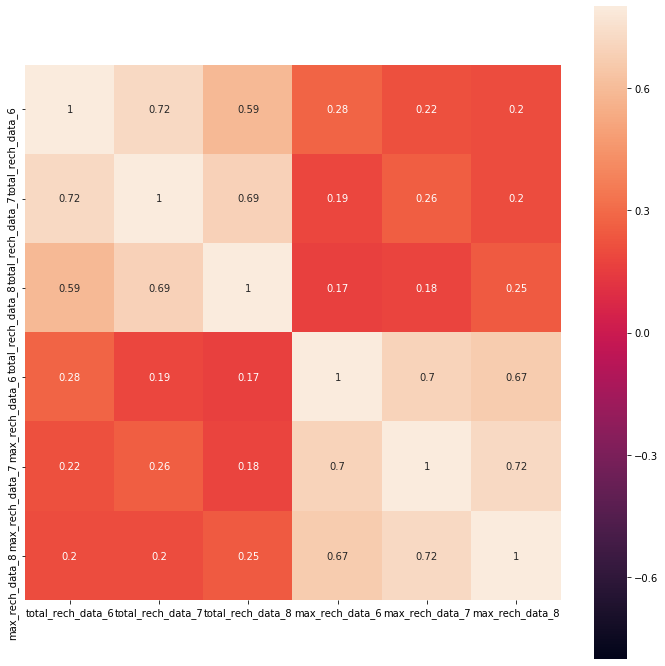

In [1148]:
# lets look at rech_data columns
cols = [c for c in master_df.columns if 'rech_data' in c]
corr = master_df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1149]:
new_cols = [c.split('_6')[0] for c in cols if '_6' in c]
for c in new_cols:
    master_df[c] = (master_df[c+'_6'] + master_df[c+'_7'] + master_df[c+'_8'])/3
    
master_df = master_df.drop(columns=cols)

In [1150]:
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'total_rech_num_6', 'total_rech_num_7']
['total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6']
['max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']
['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7']
['vol_3g_mb_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6']
['monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']
['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7']
['sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon']
['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn']
['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou']
['loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou']
['std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou']
['total_og_mou', 

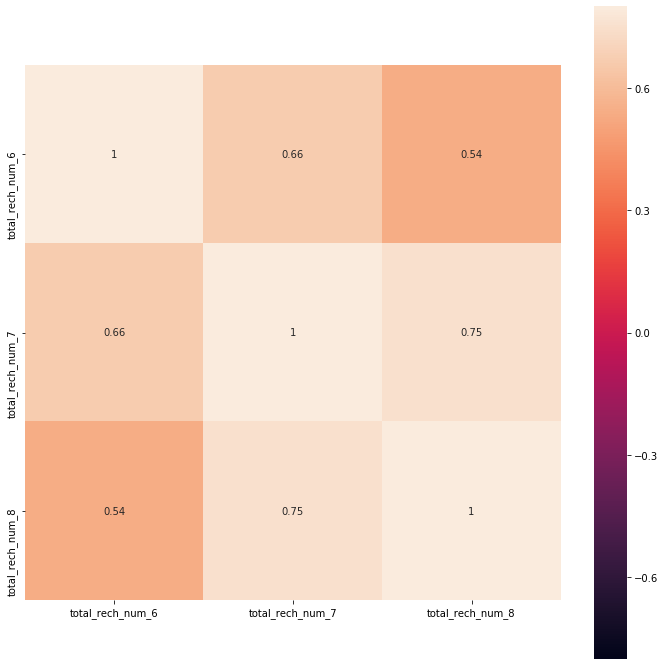

In [1151]:
# lets look at rech_num columns
cols = [c for c in master_df.columns if 'rech_num' in c]
corr = master_df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1152]:
new_cols = [c.split('_6')[0] for c in cols if '_6' in c]
for c in new_cols:
    master_df[c] = (master_df[c+'_6'] + master_df[c+'_7'] + master_df[c+'_8']) / 3
    
master_df = master_df.drop(columns=cols)
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'total_rech_amt_6', 'total_rech_amt_7']
['total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6']
['last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'night_pck_user_6', 'night_pck_user_7']
['night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6']
['sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7']
['fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
['sep_vbc_3g', 'churn', 'onnet_mou', 'offnet_mou', 'roam_ic_mou']
['roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou']
['loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou']
['isd_og_mou', 'spl_og_mou', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou']
['loc_ic_t2f_mou', 'loc_i

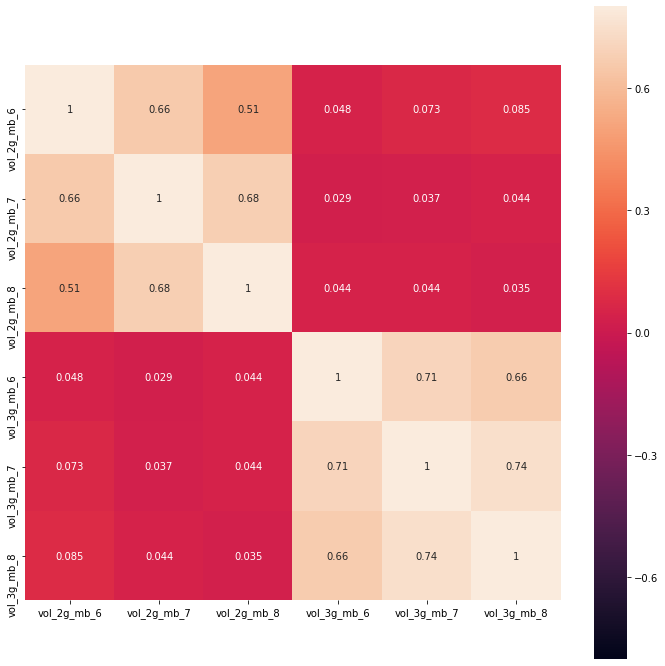

In [1153]:
# lets look at vol columns
cols = [c for c in master_df.columns if 'vol_' in c]
corr = master_df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1154]:
new_cols = [c.split('_6')[0] for c in cols if '_6' in c]
for c in new_cols:
    master_df[c] = (master_df[c+'_6'] + master_df[c+'_7'] + master_df[c+'_8']) / 3
    
master_df = master_df.drop(columns=cols)
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'total_rech_amt_6', 'total_rech_amt_7']
['total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6']
['last_day_rch_amt_7', 'last_day_rch_amt_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7']
['sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6']
['sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
['aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']
['churn', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou']
['loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou']
['std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou']
['spl_og_mou', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou']
['loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou']
['total_ic_mou'

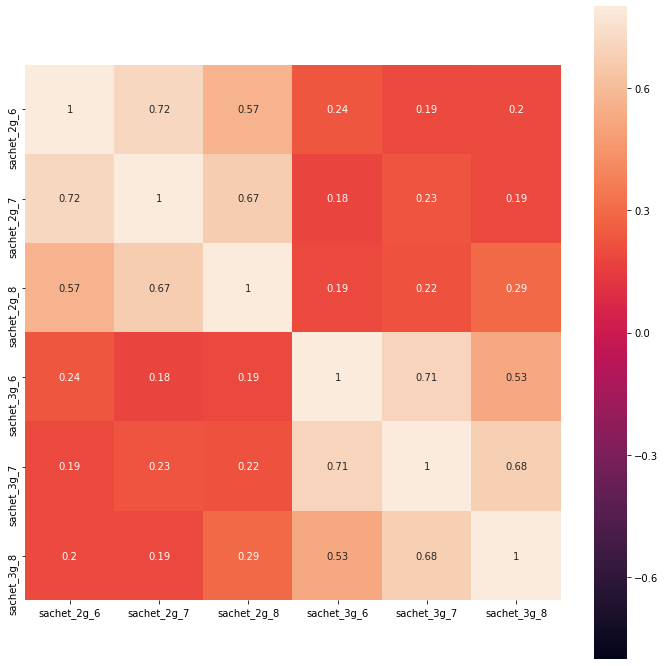

In [1155]:
# lets look at sachet columns
cols = [c for c in master_df.columns if 'sachet' in c]
corr = master_df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1156]:
master_df[cols].describe()

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.499817,0.586877,0.607525,0.138063,0.150339,0.140498
std,1.698845,1.900280,1.844605,0.875984,0.969779,0.975212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,48.000000,44.000000,29.000000,35.000000,41.000000


In [1157]:
master_df['sachet_2g_6'].value_counts()

0     24754
1      2361
2      1007
3       604
4       399
5       210
6       152
7       106
8        86
9        71
10       52
12       44
11       30
13       17
14       16
15       13
17       11
19        9
18        9
16        7
22        4
21        3
25        3
24        3
20        3
30        1
27        1
34        1
39        1
32        1
Name: sachet_2g_6, dtype: int64

These are categorical, don't touch them.

In [1158]:
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'total_rech_amt_6', 'total_rech_amt_7']
['total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6']
['last_day_rch_amt_7', 'last_day_rch_amt_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7']
['sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6']
['sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
['aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']
['churn', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou']
['loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou']
['std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou']
['spl_og_mou', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou']
['loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou']
['total_ic_mou'

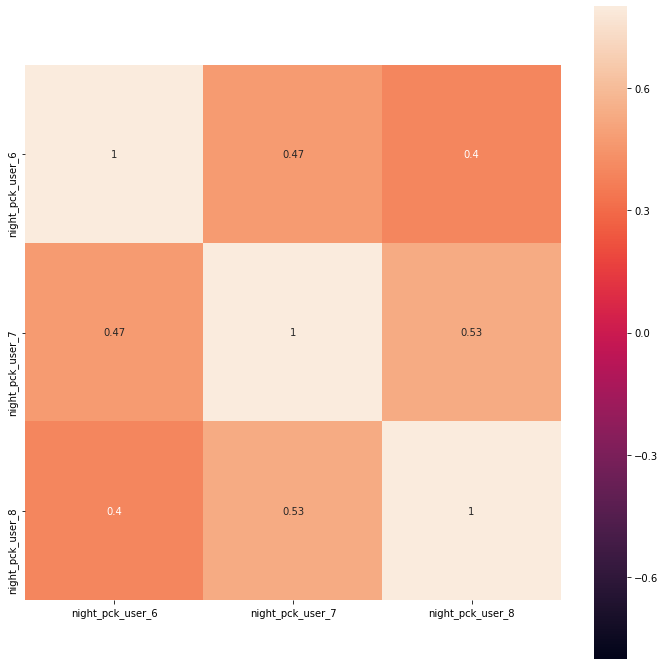

In [1159]:
# lets look at night pck columns
cols = [c for c in master_df.columns if 'night_pck' in c]
corr = master_df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1160]:
master_df[cols].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8
count,29979.000000,29979.000000,29979.000000
mean,0.010374,0.009874,0.009307
std,0.101324,0.098876,0.096022
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


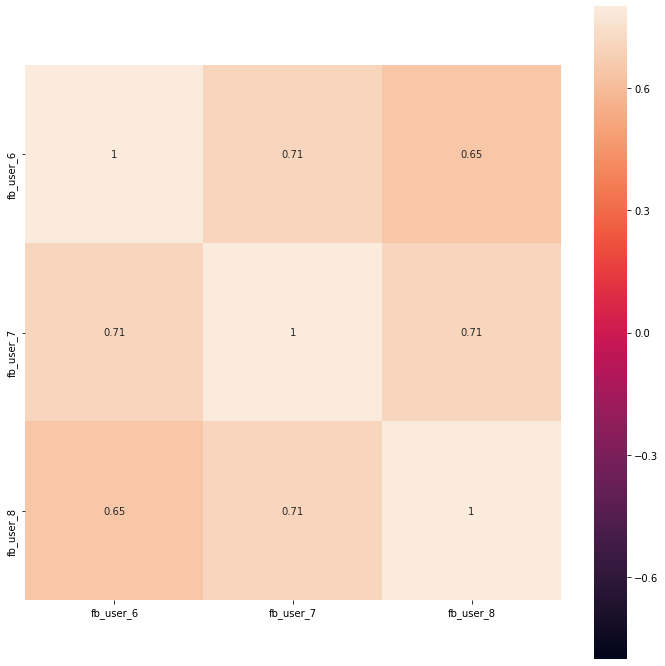

In [1161]:
# lets look at fb usr columns
cols = [c for c in master_df.columns if 'fb_user' in c]
corr = master_df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1162]:
master_df[cols].describe()

,fb_user_6,fb_user_7,fb_user_8
count,29979.000000,29979.000000,29979.000000
mean,0.340939,0.345842,0.327930
std,0.474033,0.475650,0.469467
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


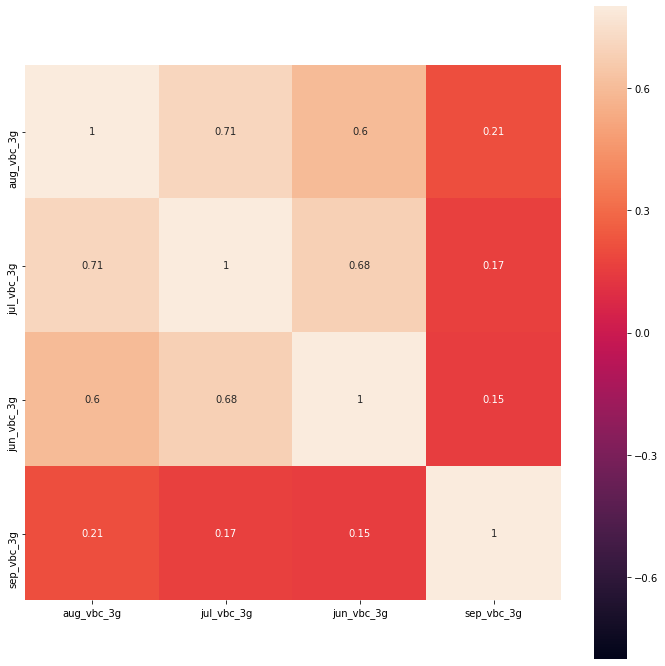

In [1163]:
# lets look at vbc  columns
cols = [c for c in master_df.columns if 'vbc_' in c]
corr = master_df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [1164]:
# drop sept vbc
master_df = master_df.drop(columns=['sep_vbc_3g'])

In [1165]:
cols = [c for c in master_df.columns if 'vbc_' in c]
cols

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [1166]:
master_df[cols].describe()

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,29979.000000,29979.000000,29979.000000
mean,129.482436,135.225368,121.450911
std,390.625027,408.218570,389.910814
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.600000,2.025000,0.000000
max,12916.220000,9165.600000,11166.210000


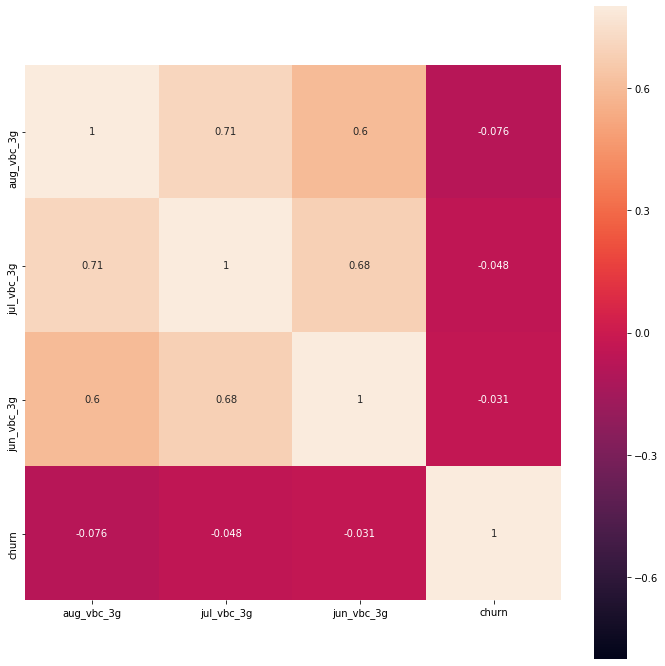

In [1167]:
# lets look at vbc  columns
corr = master_df[cols + ['churn']].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

No relation seen, and the values are skewed. Better to drop them.

In [1168]:
   master_df = master_df.drop(columns=cols)
pretty_print_cols(master_df)

['og_others_6', 'og_others_7', 'og_others_8', 'total_rech_amt_6', 'total_rech_amt_7']
['total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6']
['last_day_rch_amt_7', 'last_day_rch_amt_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7']
['sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6']
['sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
['aon', 'churn', 'onnet_mou', 'offnet_mou', 'roam_ic_mou']
['roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou']
['loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou']
['isd_og_mou', 'spl_og_mou', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou']
['loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou']
['std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'arpu']
['arpu_data', 'av_r

In [1060]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

<IPython.core.display.Javascript object>

#### Outlier treatment

In [1169]:
master_df.shape

(29979, 70)

In [1170]:
# get all columns where the values are continuous
cont_vars = []
for c in master_df.columns:
    if master_df[c].value_counts().shape[0] >= 20:
        cont_vars.append(c)
len(cont_vars)

57

In [1171]:
pretty_print_cols_list(cont_vars)

['og_others_6', 'og_others_7', 'og_others_8', 'total_rech_amt_6', 'total_rech_amt_7']
['total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6']
['last_day_rch_amt_7', 'last_day_rch_amt_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']
['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'onnet_mou']
['offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou']
['loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou']
['std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'total_og_mou']
['loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou']
['std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou']
['isd_ic_mou', 'arpu', 'arpu_data', 'av_rech_amt_data', 'count_rec_2g']
['count_rec_3g', 'ic_others', 'total_rech_data', 'max_rech_data', 'total_rech_num']
['vol_2g_mb', 'vol_3g_mb']


In [1173]:
# cut off outliers above 3 std
def std_mean(df, col, steps=3):
    return df[col].mean() + steps * np.std(df[col])

for c in cont_vars:
    master_df = master_df[np.abs(master_df[c]) < std_mean(master_df, c, steps=3)]

In [1174]:
master_df.shape

(11894, 70)

In [470]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

<IPython.core.display.Javascript object>

In [1175]:
# sns.pairplot(master_df.sample(random_state=100, n=5000))

### Modelling

In [1176]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE

In [1177]:
X = master_df.drop(columns=['churn'])
y = master_df['churn']

In [1178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)

(9515, 69)
(2379, 69)


#### Handle class imbalance

In [1179]:
y_train.value_counts()

0    8421
1    1094
Name: churn, dtype: int64

In [1180]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [1181]:
y_train.value_counts()

1    8421
0    8421
Name: churn, dtype: int64

In [1182]:
# Scaling
scaler = StandardScaler()
X_train_processed = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_processed = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [1183]:
# we want to identify churners correctly
scoring = 'recall'

#### Model for prediction

In [1184]:
X_train = X_train_processed.copy()
X_test = X_test_processed.copy()

#### PCA

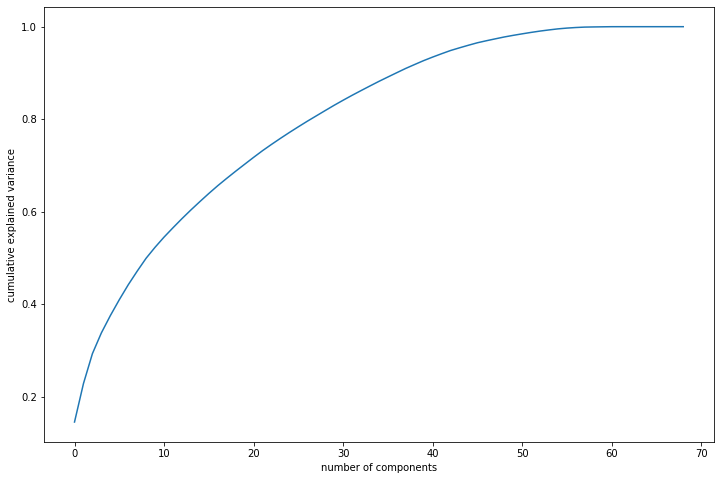

In [1185]:
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(X_train)

# scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can pick number of components sufficient to explain more than 90% variance.

In [1186]:
num_pca_components = master_df.shape[1]
for i, val in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if val >= 0.9:
        num_pca_components = i
        break
print(num_pca_components)        

36


In [1187]:
pca = PCA(svd_solver='randomized', random_state=42, n_components=num_pca_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### Model 1: Logistic Regression with PCA

In [1188]:
params = {'C': [1e-10, 1e-5, 1e-4, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(random_state=100),
                    param_grid=params,
                    scoring=scoring,
                    cv=5)

grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best params = {grid.best_params_}")

Best score = 0.8390928762237714
Best params = {'C': 1e-05}


In [1189]:
def print_results(X_test, y_test, model):
    y_pred = model.predict(X_test)
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print_results(X_test, y_test, grid)

Confusion matrix:
 [[1444  664]
 [  54  217]]
Recall: 0.8007380073800738
Accuracy: 0.698192517864649


#### Model 2: Decision tree with PCA

In [1190]:
params = {'min_samples_leaf': np.arange(400, 1000, 200),
          'max_depth': np.arange(6, 12, 2)}

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=params,
                    scoring=scoring,
                    cv=5)

grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best params = {grid.best_params_}")

Best score = 0.7541860907687645
Best params = {'max_depth': 6, 'min_samples_leaf': 400}


In [1191]:
print_results(X_test, y_test, grid)

Confusion matrix:
 [[1520  588]
 [  79  192]]
Recall: 0.7084870848708487
Accuracy: 0.719630096679277


#### Model 3: Random Forest with PCA

In [1192]:
params = {'min_samples_leaf': np.arange(400, 1000, 200),
          'max_depth': np.arange(2, 8, 2)}

grid = GridSearchCV(RandomForestClassifier(random_state=0),
                    param_grid=params,
                    scoring=scoring,
                    cv=5)

grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best params = {grid.best_params_}")

Best score = 0.7630890842067425
Best params = {'max_depth': 4, 'min_samples_leaf': 400}


In [1193]:
print_results(X_test, y_test, grid)

Confusion matrix:
 [[1718  390]
 [ 106  165]]
Recall: 0.6088560885608856
Accuracy: 0.7915090374106768


#### Model 4: Adaboost with PCA

In [1194]:
estimators = np.arange(2, 14, 2)

shallow_tree = DecisionTreeClassifier(max_depth=8,
                                      min_samples_leaf=550)

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = recall_score(y_test, y_pred)
    abc_scores.append(score)
    
print(abc_scores)

[0.6273062730627307, 0.6088560885608856, 0.6309963099630996, 0.6051660516605166, 0.6088560885608856, 0.6125461254612546]


#### Model for Interpretability

In [1195]:
X_train = X_train_processed.copy()
X_test = X_test_processed.copy()

In [1196]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 10
lm = LogisticRegression(max_iter=5000)
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# selected columns
cols = X_train.columns[rfe.support_]

cols

Index(['total_rech_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'count_rec_2g',
       'count_rec_3g', 'total_rech_data'],
      dtype='object')

In [1197]:
import statsmodels.api as sm

In [1198]:
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lm.fit().summary()

/home/shakeeb/anaconda3/envs/kaggle/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/shakeeb/anaconda3/envs/kaggle/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/home/shakeeb/anaconda3/envs/kaggle/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/home/shakeeb/anaconda3/envs/kaggle/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/home/shakeeb/anaconda3/envs/kaggle/lib/python3.6/site-packages/statsmodels/genmod/families/famil

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16842
Model:                            GLM   Df Residuals:                    16832
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 19 Feb 2020   Deviance:                          nan
Time:                        17:09:28   Pearson chi2:                 3.01e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.396e+05   1.62e+05      0.862      0.389   -1.78e+05    4.57e+05
total_rech_amt_8    -1.7102      0.030    -56.191      0.000      -1.770      -1.651
monthly_2g_6     -2.518e+05   2.92e+05     -0.862      0.389   -8.24e+05    3.21e+05
monthly_2g_7     -2.547e+05   2.96e+05     -0.862      0.389   -8.34e+05    3.25e+05
monthly_2g_8     -2.206e+05   2.56e+05     -0.862      0.389   -7.22e+05    2.81e+05
sachet_2g_6      -5.135e+05   5.96e+05     -0.862      0.389   -1.68e+06    6.55e+05
sachet_2g_7      -4.663e+05   5.41e+05     -0.862      0.389   -1.53e+06    5.94e+05
sachet_2g_8      -4.526e+05   5.25e+05     -0.862      0.389   -1.48e+06    5.77e+05
count_rec_2g      6.934e+05   8.05e+05      0.862      0.389   -8.84e+05    2.27e+06
count_rec_3g     -1.824e+05   2.12e+05     -0.862      0.389   -5.97e+05    2.33e+05
total_rech_data   5.704e+05   6.62e+05      0.862      0.389   -7.27e+05    1.87e+06
====================================================================================
"""

In [1200]:
cols = cols.drop('sachet_2g_7')
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16842
Model:                            GLM   Df Residuals:                    16833
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7743.3
Date:                Wed, 19 Feb 2020   Deviance:                       15487.
Time:                        17:10:24   Pearson chi2:                 2.76e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2175      0.023     -9.379      0.000      -0.263      -0.172
total_rech_amt_8    -1.5981      0.026    -60.367      0.000      -1.650      -1.546
monthly_2g_6        -0.5045      0.034    -14.747      0.000      -0.572      -0.437
monthly_2g_7        -0.4587      0.034    -13.468      0.000      -0.525      -0.392
monthly_2g_8        -0.5445      0.064     -8.523      0.000      -0.670      -0.419
sachet_2g_6         -0.5398      0.033    -16.565      0.000      -0.604      -0.476
sachet_2g_8         -0.8768      0.044    -20.056      0.000      -0.962      -0.791
count_rec_2g         0.5578      0.028     19.661      0.000       0.502       0.613
count_rec_3g        -0.1876      0.022     -8.407      0.000      -0.231      -0.144
total_rech_data      0.4458      0.023     19.446      0.000       0.401       0.491
====================================================================================
"""

All the columns are significant now.

In [1201]:
lm = LogisticRegression()

lm.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1203]:
print_results(X_test[cols], y_test, lm)

Confusion matrix:
 [[1619  489]
 [  60  211]]
Recall: 0.7785977859778598
Accuracy: 0.7692307692307693


#### Interpretation:
1. Higher total recharge on data, more likely to churn.
2. More number of 2g recharge counts, more likely to churn.
3. If total recharge amount in month 8 is high, one is less likely to churn.